In [93]:
#importing library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error

In [2]:
df= pd.read_csv('CarPrice_Assignment.csv')
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.duplicated().sum()

0

In [7]:
#know non values 
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
#know your data
for i in df.columns:
    print(i ,"...", df[i].nunique())
    print( df[i].value_counts())
    print("\n" + "*"*20 + "\n" )

car_ID ... 205
1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: car_ID, Length: 205, dtype: int64

********************

symboling ... 6
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

********************

CarName ... 147
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

********************

fueltype ... 2
gas       185
diesel     20
Name: fueltype, dtype: int64

********************

aspiration ... 2
std      168
turbo     37
Name: aspiration, dtype: int64

********************

doornumber ... 2
four    115
two      90
Name: doornumber, dtype: int64

********************

carbody ... 5
sedan          96
hatchback      

In [10]:
le = LabelEncoder()

In [18]:
fuelsystem_le       = LabelEncoder()
df['fuelsystem']    =  fuelsystem_le.fit_transform(df.fuelsystem)

In [19]:
fueltype_le       = LabelEncoder()
df['fueltype']       =  fueltype_le.fit_transform(df.fueltype)

In [21]:
aspiration_le    = LabelEncoder()
df['aspiration']    = aspiration_le.fit_transform(df.aspiration)


In [28]:
doornumber_le = LabelEncoder()
df['doornumber'] = doornumber_le.fit_transform(df.doornumber )

In [23]:
carbody_le    = LabelEncoder()
drivewheel_le = LabelEncoder()
df['carbody']    =  carbody_le.fit_transform(df.carbody)
df['drivewheel'] =  drivewheel_le.fit_transform(df.drivewheel)        

In [25]:
cylindernumber_le    = LabelEncoder()
enginetype_le= LabelEncoder()
df['cylindernumber'] =  cylindernumber_le.fit_transform(df.cylindernumber )
df['enginetype']  = enginetype_le.fit_transform(df.enginetype)

In [29]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dornumber
0,1,3,alfa-romero giulia,1,0,1,0,2,front,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,alfa-romero stelvio,1,0,1,0,2,front,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,front,94.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi 100 ls,1,0,0,3,1,front,99.8,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,5,2,audi 100ls,1,0,0,3,0,front,99.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,0,3,2,front,109.1,...,5,3.78,3.15,9.5,114,5400,23,28,16845.0,0
201,202,-1,volvo 144ea,1,1,0,3,2,front,109.1,...,5,3.78,3.15,8.7,160,5300,19,25,19045.0,0
202,203,-1,volvo 244dl,1,0,0,3,2,front,109.1,...,5,3.58,2.87,8.8,134,5500,18,23,21485.0,0
203,204,-1,volvo 246,0,1,0,3,2,front,109.1,...,3,3.01,3.40,23.0,106,4800,26,27,22470.0,0


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

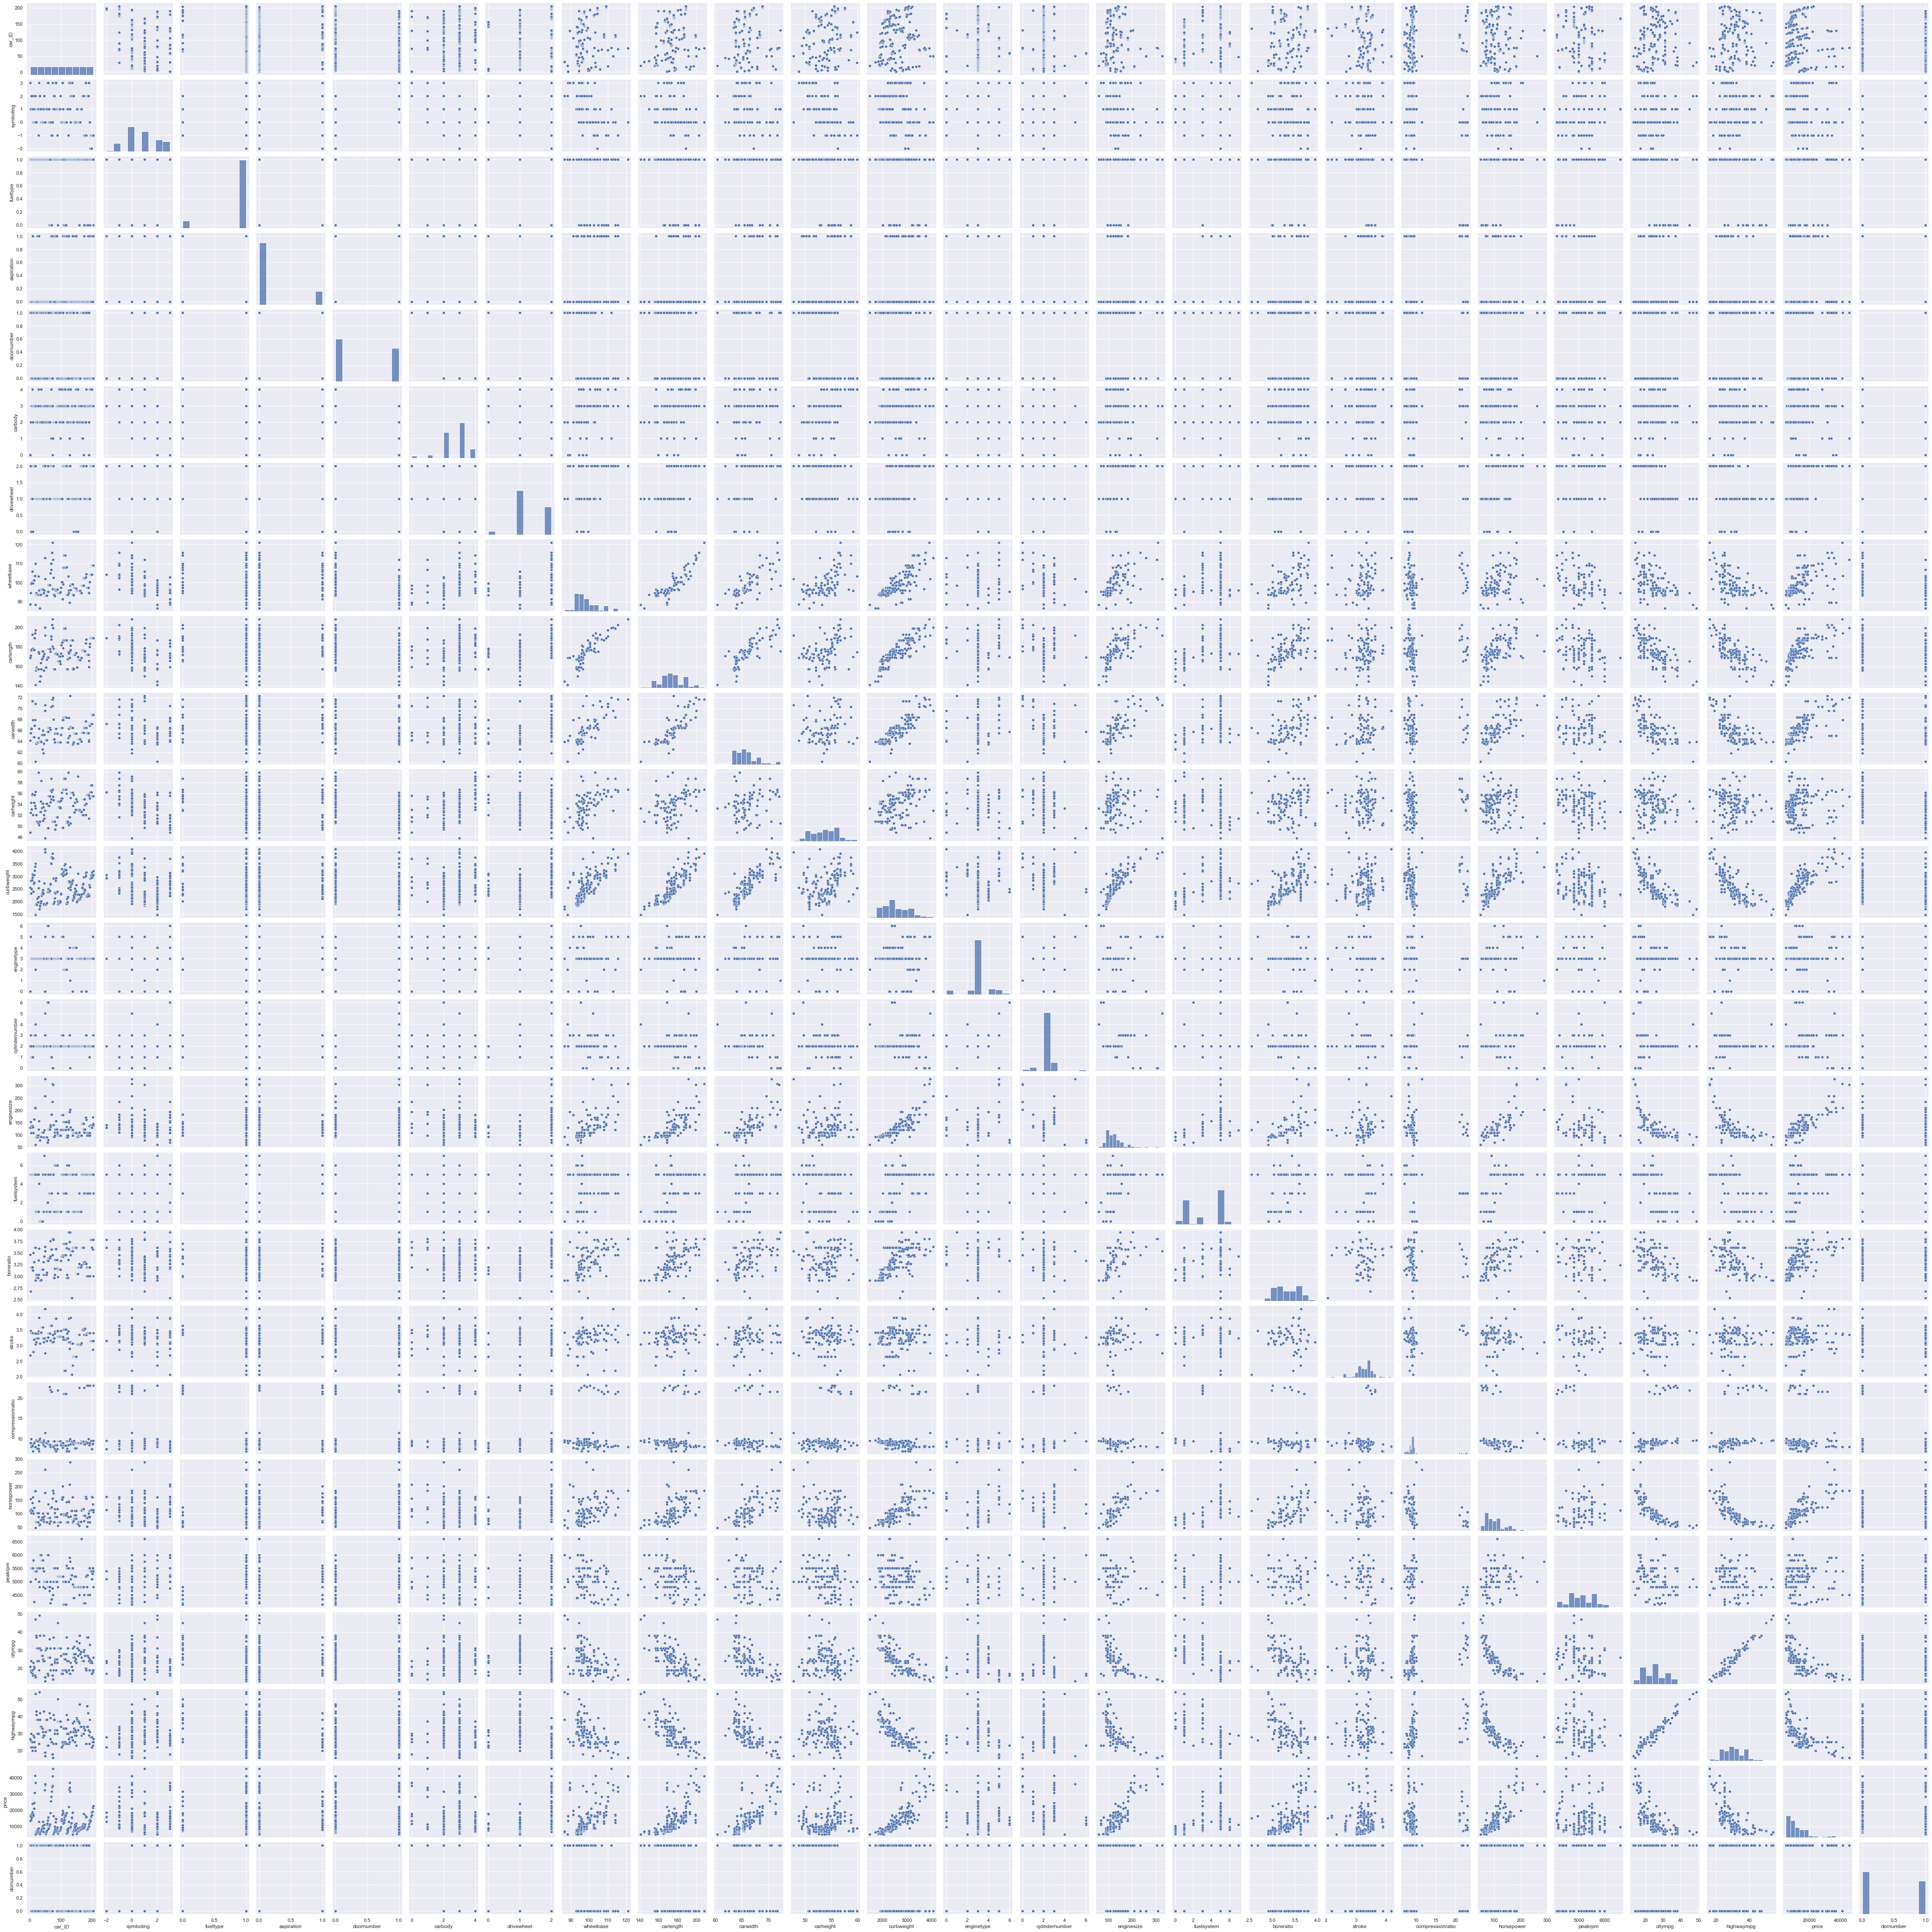

In [31]:
sns.pairplot(df)


<AxesSubplot:>

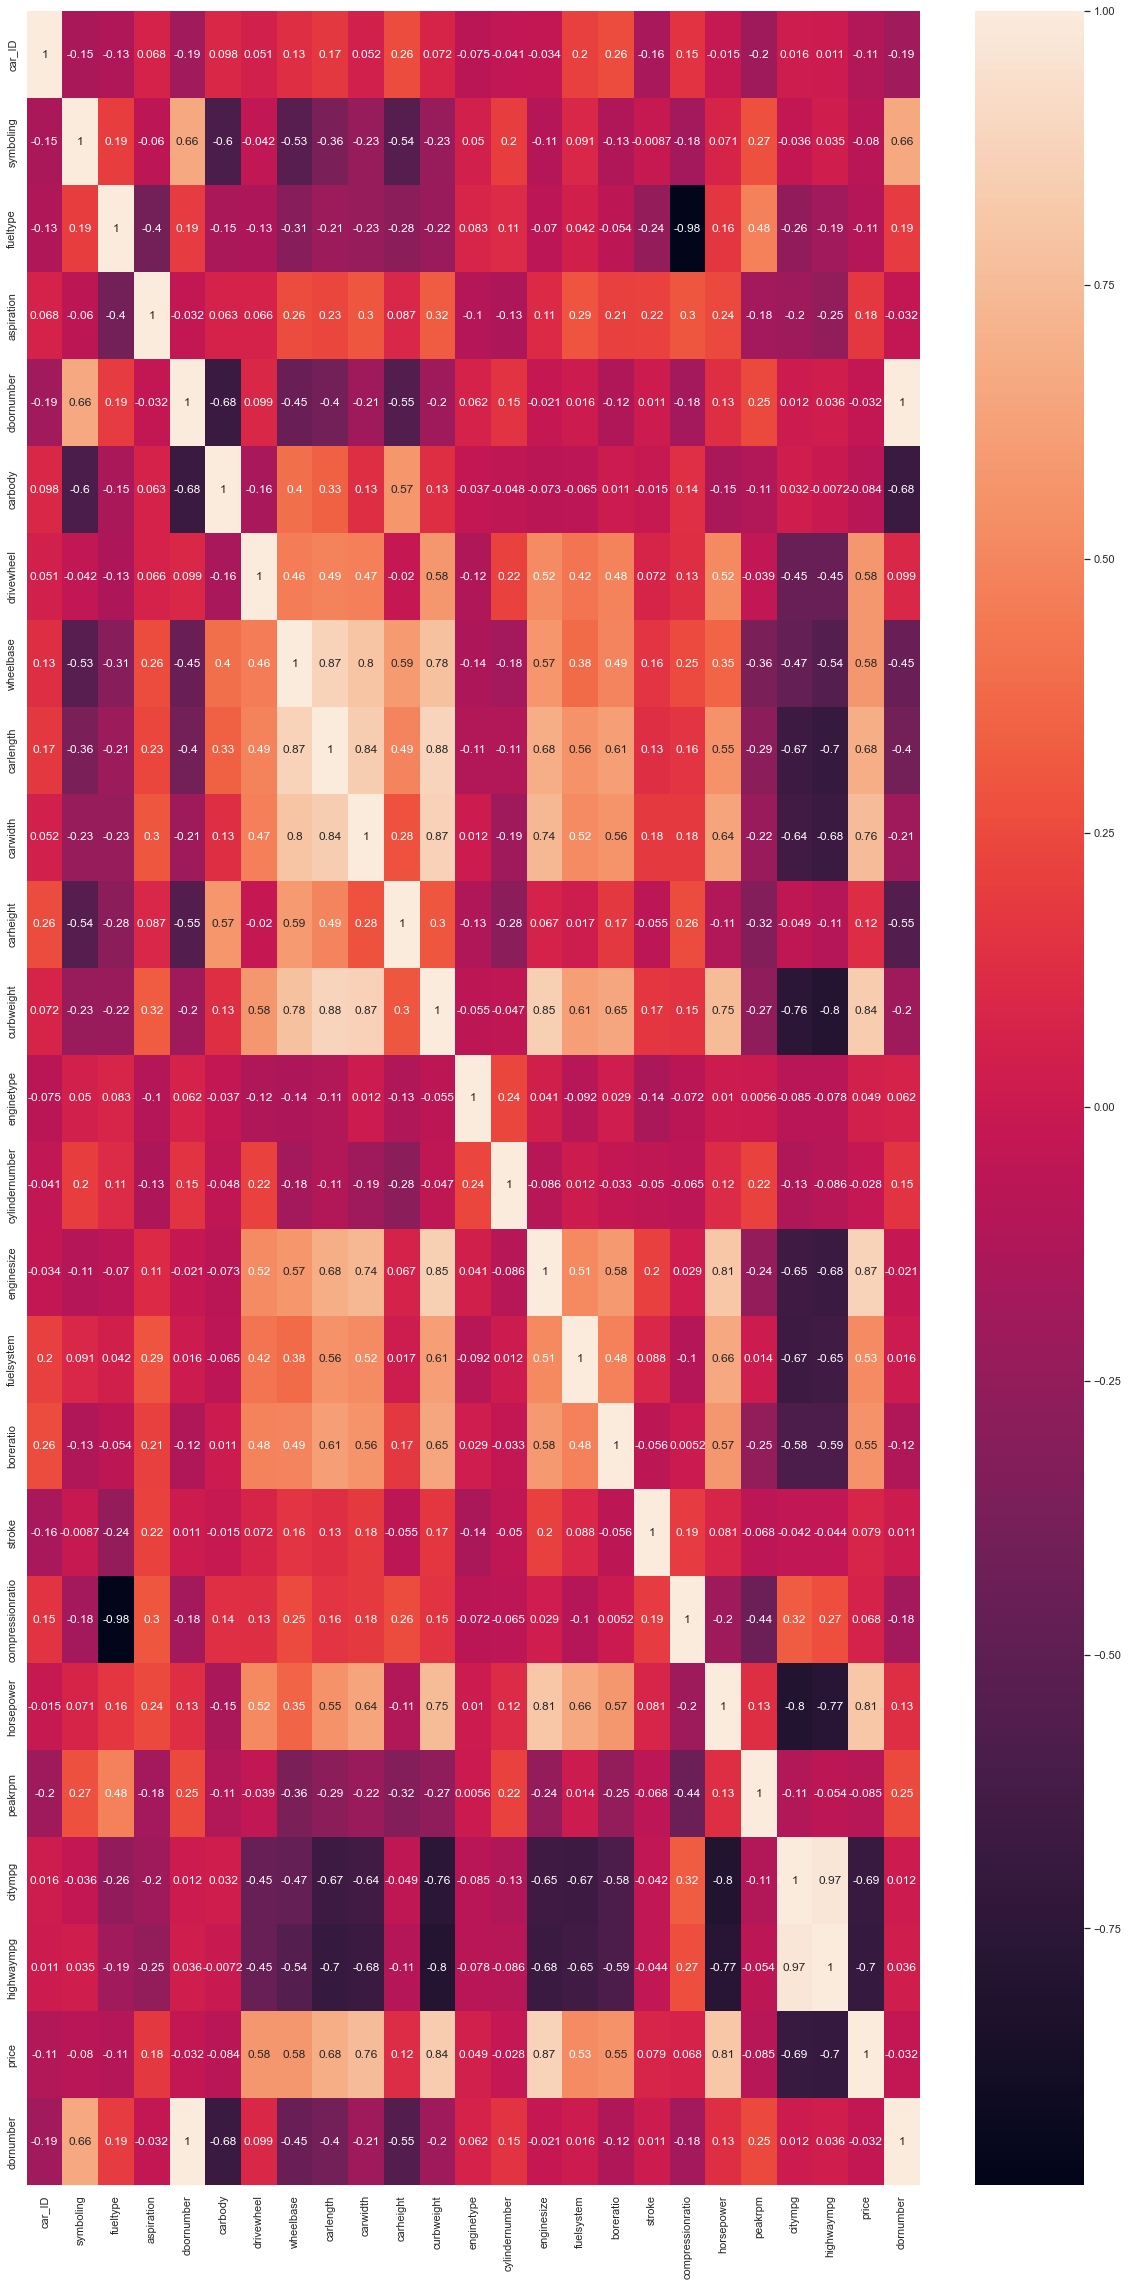

In [45]:
plt.figure(figsize=(20, 40))
sns.heatmap(df.corr(),annot = True)

In [36]:
#Correlation with output variable
corr = df.corr()
cor_target = abs(corr["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features  ## posssible features

drivewheel    0.577992
wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
fuelsystem    0.526823
boreratio     0.553173
horsepower    0.808139
citympg       0.685751
highwaympg    0.697599
price         1.000000
Name: price, dtype: float64

<AxesSubplot:title={'center':'Distribution of prices'}, xlabel='price', ylabel='Count'>

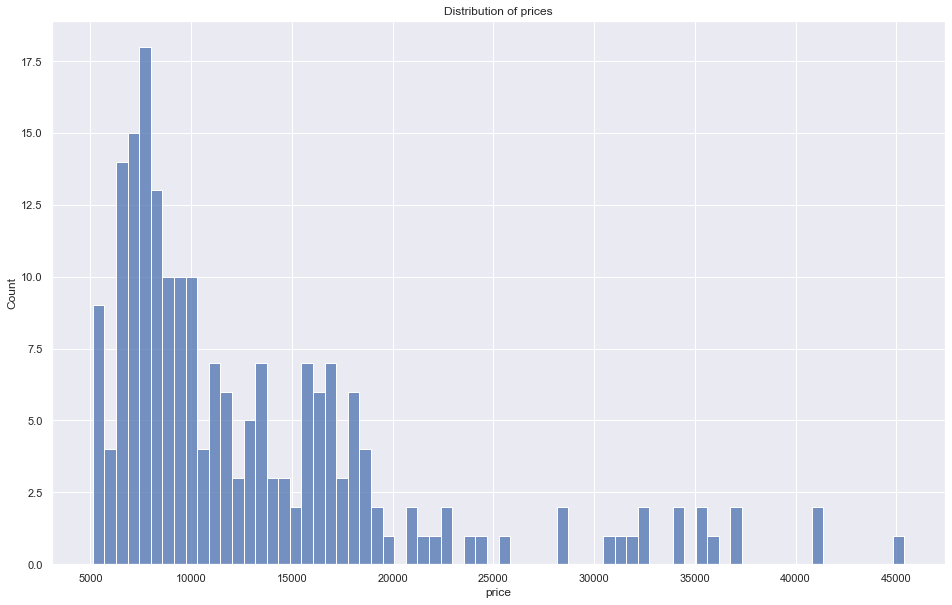

In [46]:
#Distribution of prices
plt.figure(figsize=(16, 10))
plt.title('Distribution of prices')

sns.histplot(df.price, bins=70)


In [57]:
columns_selected = ['drivewheel'
,'wheelbase'
,'carlength'
,'carwidth'
,'curbweight'
,'enginesize' 
,'fuelsystem' 
,'boreratio'
,'horsepower'
,'citympg'
,'highwaympg'    
,'price']
data = df[columns_selected]
data.head()

,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,2,88.6,168.8,64.1,2548,130,5,3.47,111,21,27,13495.0
1,2,88.6,168.8,64.1,2548,130,5,3.47,111,21,27,16500.0
2,2,94.5,171.2,65.5,2823,152,5,2.68,154,19,26,16500.0
3,1,99.8,176.6,66.2,2337,109,5,3.19,102,24,30,13950.0
4,0,99.4,176.6,66.4,2824,136,5,3.19,115,18,22,17450.0


In [88]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)
print("Train set size is ",len(train_data))
print("Test set size is ",len(test_data))

Train set size is  164
Test set size is  41


C:\Users\Mcs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


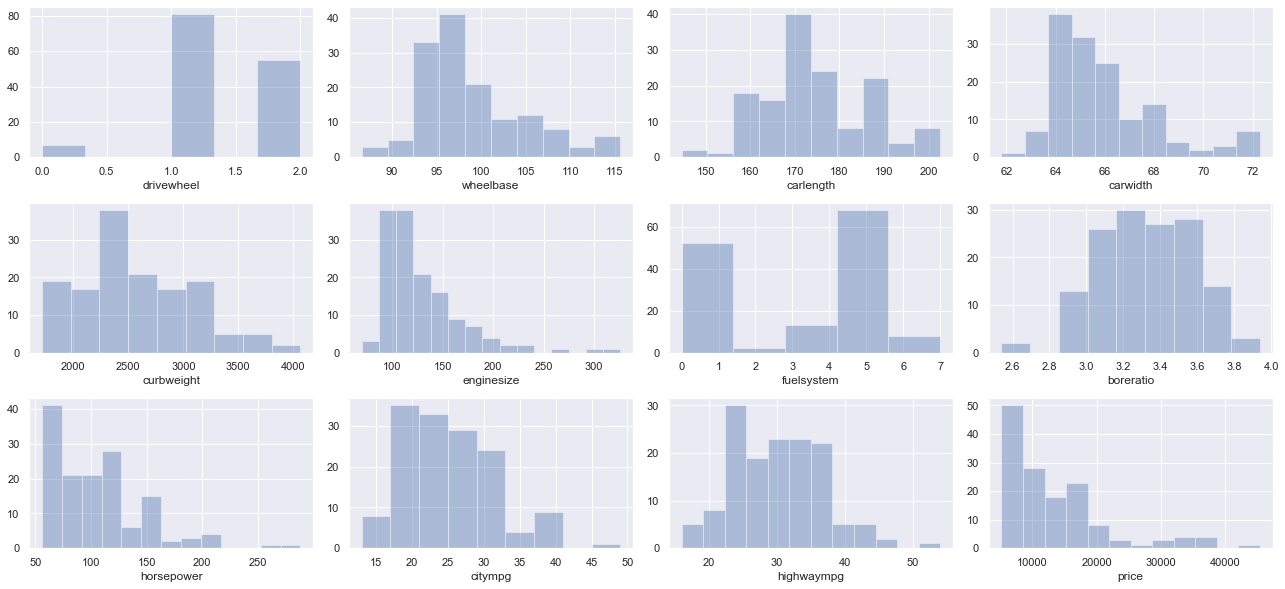

In [61]:
# distribution
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(columns_selected):
    plt.subplot(6,4,index+1)
    sns.distplot(train_data.loc[:,col], kde=False)
fig.tight_layout(pad=1.0)

In [ ]:
train_preped, test_preped =  prep_df(train_data, test_data)

In [92]:

# scale features
def prep_df(train, test, cols):
    # scale features    
    transformer = RobustScaler().fit(train[cols])
    train[cols] = transformer.transform(train[cols])
    test[cols] = transformer.transform(test[cols])
    return train, test

In [84]:
prep_columns = ['drivewheel'
,'wheelbase'
,'carlength'
,'carwidth'
,'curbweight'
,'enginesize' 
,'fuelsystem' 
,'boreratio'
,'horsepower'
,'citympg'
,'highwaympg']
train_preped , test_preped =  prep_df(train_data, test_data, prep_columns)

C:\Users\Mcs\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Mcs\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [85]:
X = ['drivewheel'
,'wheelbase'
,'carlength'
,'carwidth'
,'curbweight'
,'enginesize' 
,'fuelsystem' 
,'boreratio'
,'horsepower'
,'citympg'
,'highwaympg']
# Target
y = 'price'

# select columns
train_X = train_preped[X]
train_y = train_preped[y]
test_X = test_preped[X]
test_y = test_preped[y]

In [89]:
# Creating the model
model = LinearRegression()

# Fitting the model
model.fit(train_X, train_y)

# Predictions
predictions = model.predict(test_X)

In [94]:
print(f"Train accuracy {round(model.score(train_X,train_y)*100,2)} %")
print(f"Test accuracy {round(model.score(test_X,test_y)*100,2)} %")

Train accuracy 83.22 %
Test accuracy 81.93 %
